In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
x_data = pd.read_csv("weightedX.csv")
y_data = pd.read_csv("weightedY.csv")
x_data = x_data.values
y_data = y_data.values
x_data = (x_data-x_data.mean())/x_data.std()

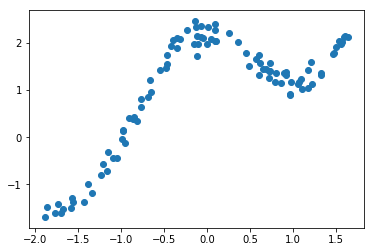

In [2]:
plt.scatter(x_data,y_data)
plt.show()

In [73]:
def weight(X,query,tau):
    m = X.shape[0]
    '''
    weight = []
    for i in range(m):
        term = (np.dot((X[i]-query),(X[i]-query).T)/2*tau*tau)
        term = -1*term
        term = np.exp(term)
        weight.append(term)
    weight = np.array(weight)
    weight = weight.reshape(-1,)
    print(weight.shape)
    weight = np.diag(weight)
    '''
    weight = np.array(np.eye(m))
    for i in range(m):
        term = np.exp(np.dot((X[i]-query),(X[i]-query).T)/(-2*tau*tau))
        weight[i,i] = term
    
    return weight
def closed_form_lowless(X,Y,query,tau):
    m = X.shape[0]
    one = np.ones((m,1))
    X_ = np.hstack((X,one))
    X_ = np.mat(X_)
    query_ = np.mat([query,1])
    w = weight(X_,query_,tau)
    first_term = np.dot(X_.T,w)
    first_term = np.dot(first_term,X_)
    first_term = np.linalg.pinv(first_term)
    second_term = np.dot(X_.T,w)
    second_term = np.dot(second_term,Y)
    theta = first_term*second_term
    
    return theta



# Plotting


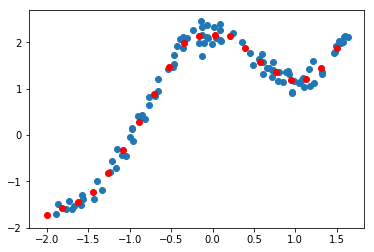

In [76]:
def prediction(query):
    theta = closed_form_lowless(x_data,y_data,query,0.1)
    query_ = np.mat([query,1])
    pred = np.dot(query_,theta)
    return pred
x_test = np.linspace(-2,1.5,20)
y_test = []
for i in x_test:
    pred  = prediction(i)
    y_test.append(pred)
y_test = np.array(y_test)
plt.scatter(x_data,y_data)
plt.scatter(x_test,y_test,color = 'r')
plt.show()
    

